In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [45]:
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [46]:
#Drop of column 'ID' and min-max scaling/normalization 

scaler = MinMaxScaler()
df_norm = data.copy()
df_norm.drop(['ID#',"Award?"], axis=1, inplace=True)

for (columnName, columnData) in df_norm.iteritems():
    scaler.fit(df_norm[[columnName]])
    df_norm[columnName] = scaler.transform(df_norm[[columnName]])
 

In [47]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


# Hierarchical Clustering

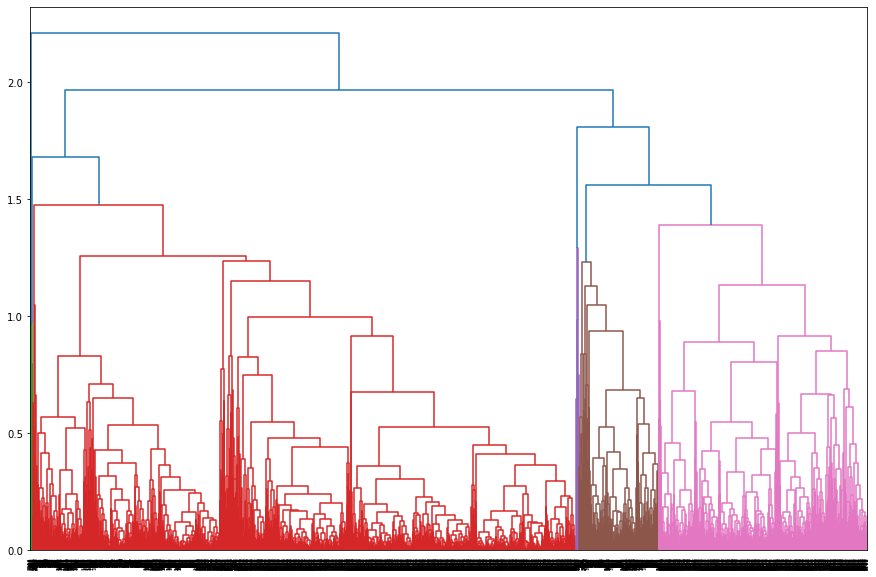

In [48]:
# Creating dendogram

plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [49]:
# create clusters

cluster_hie = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

y_hc = cluster_hie.fit_predict(df_norm)
Clust = pd.DataFrame(y_hc, columns=['Clusters'])

data_hie = data.copy()
data_hie['clusterID'] = Clust.Clusters
count = data_hie.groupby(['clusterID']).size()

data_hie2 = data_hie.groupby('clusterID').agg(['mean'])
data_hie2['count'] = count

data_hie2.iloc[:, 1:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,count
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,
clusterID,,,,,,,,,,,,
0,62223.716808,234.064972,1.019774,1.040254,1.002119,4402.119350,6.608757,527.386299,1.600282,5033.024718,0.295904,1416
1,137392.992727,130.933333,4.322424,1.001212,1.055758,53939.947879,20.734545,670.831515,2.035152,4946.453333,0.640000,825
2,32935.376271,86.981921,1.000000,1.000000,1.000000,3431.109605,6.976271,373.468927,1.089266,1741.317514,0.179661,885
3,80718.091566,33.149398,2.595181,1.000000,1.000000,15771.212048,15.400000,248.043373,0.696386,5945.012048,0.440964,415
4,65999.762009,100.703057,2.759825,1.000000,1.000000,18006.106987,16.085153,231.637555,0.644105,2738.615721,0.419214,458


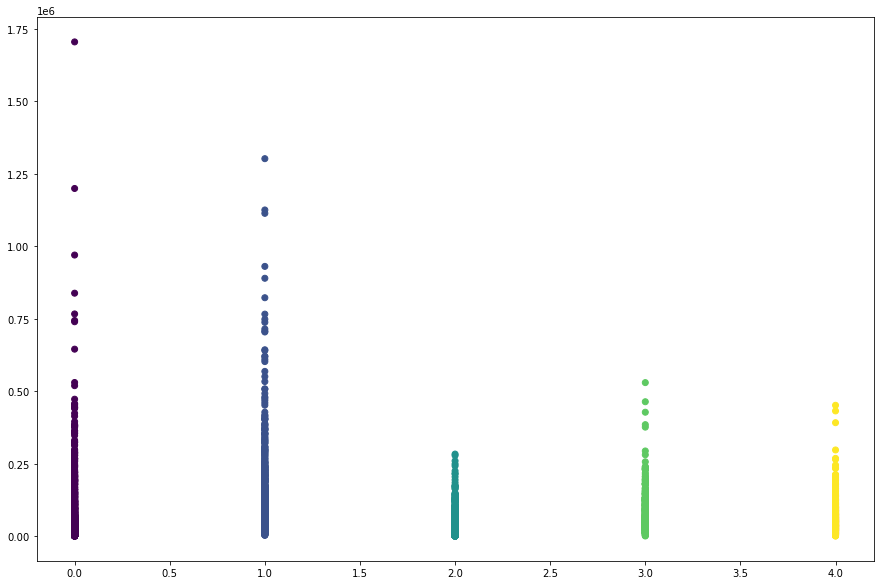

In [50]:
plt.figure(figsize=(15, 10))  
plt.scatter(data_hie['clusterID'], data_hie['Balance'], c=cluster_hie.labels_)

In [51]:
# Number of clusters are considered as 5, 'Elbow' chart can be used to find out optimal number of clusters.

'''Cluster 0 and 1 has highest records respectively, all other clusters has only 1 record which describes these are far different.
From cluster 0 and 1, cluster id 0 has less miles of all types'''

'Cluster 0 and 1 has highest records respectively, all other clusters has only 1 record which describes these are far different.\nFrom cluster 0 and 1, cluster id 0 has less miles of all types'

# K-MEANS Clustering

In [52]:
from sklearn.cluster import KMeans

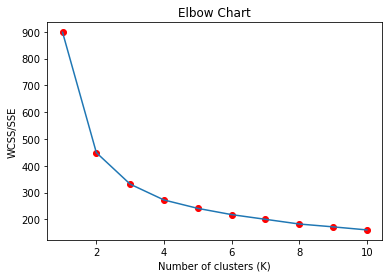

In [53]:
#finding optimum number of cluster, from Elbow chart

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11),wcss,color="red")
plt.title('Elbow Chart')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS/SSE')
plt.show()

In [54]:
# From the elbow chart, K=4 is set

clusters_km = KMeans(4, random_state=30)
clusters_km.fit(df_norm)

KMeans(n_clusters=4, random_state=30)

In [55]:
clusters_km.labels_

array([0, 0, 0, ..., 1, 2, 2])

In [56]:
clusters_km.cluster_centers_

array([[3.86801590e-02, 1.53732502e-02, 3.21061644e-02, 1.15582192e-02,
        1.49828767e-03, 1.96663769e-02, 9.31825422e-02, 1.58603362e-02,
        2.82534247e-02, 6.93431421e-01],
       [5.01893530e-02, 1.09101606e-02, 6.26102941e-01, 7.35294118e-04,
        3.30882353e-03, 1.18152084e-01, 2.09917921e-01, 1.28678021e-02,
        2.18091010e-02, 3.63864204e-01],
       [2.36637072e-02, 1.08844189e-02, 2.38434164e-02, 1.03202847e-02,
        1.24555160e-03, 1.68894259e-02, 8.32822974e-02, 1.27880380e-02,
        2.18223326e-02, 2.64864795e-01],
       [8.05499702e-02, 1.47843877e-02, 7.54021448e-01, 6.70241287e-04,
        8.71313673e-03, 1.78247067e-01, 2.29082237e-01, 1.93799495e-02,
        3.37144013e-02, 7.44413255e-01]])

In [57]:
df_air_km = data.copy()
df_air_km['clusterID'] = clusters_km.labels_
count = df_air_km.groupby(['clusterID']).size()

df_air_km2 = df_air_km.groupby('clusterID').agg(['mean']).reset_index()
df_air_km2['count'] = count

df_air_km2

,clusterID,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,count
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,
0,0,1082.311644,65943.404966,171.380993,1.128425,1.023116,1.005993,5185.728596,8.013699,488.767979,1.497432,5753.320205,0.310788,1168
1,1,2643.776141,85554.287187,121.805596,3.503682,1.001473,1.013255,31160.790869,18.055965,397.131075,1.157585,3017.675994,0.497791,679
2,2,3097.793594,40342.787189,121.339502,1.095374,1.020641,1.004982,4453.488256,7.162278,394.088968,1.156584,2198.788612,0.220641,1405
3,3,864.255689,137264.839357,164.595716,4.016064,1.001339,1.034806,46974.539491,19.696118,596.432396,1.784471,6173.950469,0.629183,747


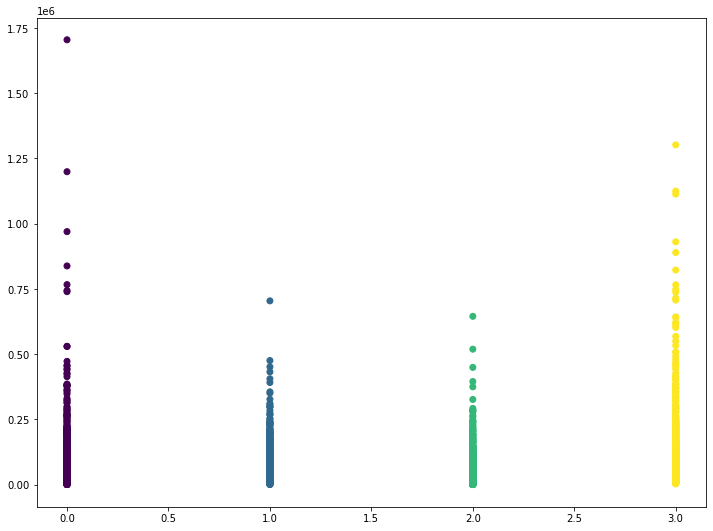

In [58]:
plt.figure(figsize=(12, 9))  
plt.scatter(df_air_km['clusterID'], df_air_km['Balance'], c=clusters_km.labels_)

# DBSCAN Clustering

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [74]:
array_air = data.drop(['ID#'], axis=1).values
stscaler = StandardScaler().fit(array_air)
X = stscaler.transform(array_air)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [75]:
dbscan_air = DBSCAN(eps=0.8, min_samples=6)
dbscan_air.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [81]:
data_dbsc = data.copy()
data_dbsc['clusterid_dbsc'] = dbscan_air.labels_

In [83]:
count = data_dbsc.groupby(['clusterid_dbsc']).size()
col = pd.DataFrame(count, columns=['count'])
data_dbsc2 = df_air_dbsc.groupby('clusterid_dbsc').agg(['mean'])

pd.concat([data_dbsc2, col], axis=1)

,"(ID#, mean)","(Balance, mean)","(Qual_miles, mean)","(cc1_miles, mean)","(cc2_miles, mean)","(cc3_miles, mean)","(Bonus_miles, mean)","(Bonus_trans, mean)","(Flight_miles_12mo, mean)","(Flight_trans_12, mean)","(Days_since_enroll, mean)","(Award?, mean)",count
clusterid_dbsc,,,,,,,,,,,,,
-1,1744.781707,158564.875610,698.553659,2.670732,1.056098,1.059756,35956.408537,20.157317,1805.067073,5.232927,4647.563415,0.654878,820
0,2185.088899,50589.121390,0.676895,1.629964,1.000000,1.000000,8534.324458,8.112365,85.902978,0.291065,3790.477888,0.000000,2216
1,1830.398305,54510.457627,2.118644,2.543432,1.000000,1.000000,21126.111229,12.194915,179.287076,0.590042,4458.901483,1.000000,944
2,2477.833333,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.000000,12
3,3822.142857,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.000000,7


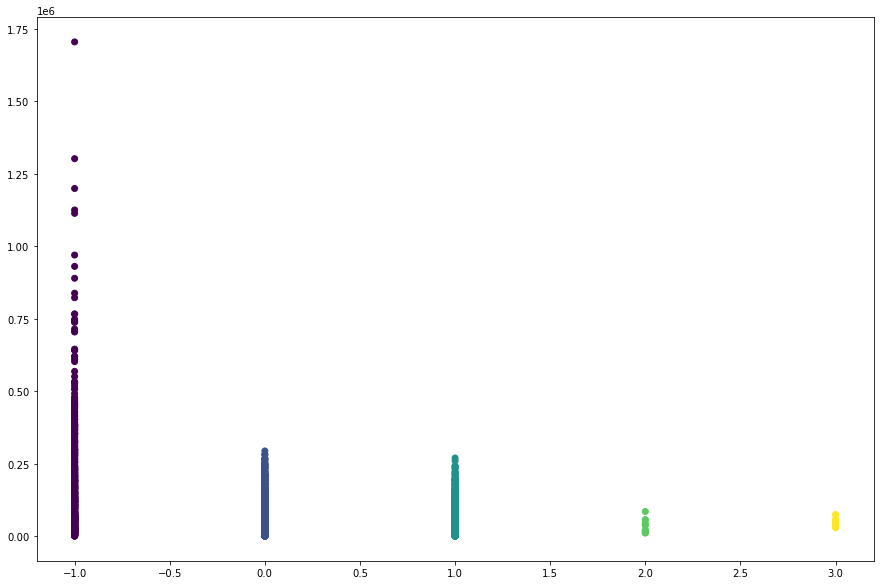

In [84]:
# Plot Clusters

plt.figure(figsize=(15, 10))
plt.scatter(df_air_dbsc['clusterid_dbsc'], df_air_dbsc['Balance'], c=dbscan_air.labels_)